In [202]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [203]:
data_frame = pd.read_csv('dstest.csv', delimiter=',', header=0)
number_of_samples = data_frame.shape[0] 
number_of_features = data_frame.shape[1]

In [204]:
data_frame.iloc[:, 1:].head()

,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content
0,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235
1,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235
2,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235
3,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235
4,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235


# Question 1

The easiest solution that comes to my mind: The Bit Rate as a streaming company's performance metric.
Bit rate - the total number of bits of data, transferred per unit of time (most commonly - per second, which means that the unit of measurement - bit/s or so-called bps):

$$Bit\ Rate = BR = \frac{number\ of\ bits,\ bits}{elapsed\ time,\ seconds} = \frac{b}{t}.$$

So all we have to do is calculate the average bitrate value for the given set of samples for each company. In the current case, each sample was taken after a constant time gap - 2 minutes - 120 seconds. Hence, the formula for our bitrate will look like:

$$BR_i = \frac{1}{N_i \cdot \Delta t} \cdot \sum_{j = 1}^{N_i}{b_{ij}},$$
where:
- $i \in \{1,\ ...,\ M\}$ - number of company;
- $M$ - total number of companies;
- $j \in \{1,\ ...,\ N_i\}$ - number of sample;
- $N_i$ - total number of samples for $i^{th}$ company;
- $b_{ij} =  p2p + cdn + upload$ - number of transferred bits of $j^{th}$ sample of $i^{th}$ company;
- $\Delta t = const = 120\ seconds$ - time interval.

In [251]:
def bitrate(data_frame):
    # choosing the features (so-called performance features), necessary to calculate performance: 
    interested_features = ['company', 'p2p', 'cdn', 'upload']

    # computing the mean value of each performance feature for each company:
    grouped_data_frame = data_frame[interested_features].groupby(['company']).mean()

    # adding indices:
    grouped_data_frame.reset_index(inplace=True)

    delta_t = 120 # our constant time interval

    # adding a new feature as a result of a sum of performance features values,
    # multiplied by 8 (from bytes to bits), divided by time interval
    grouped_data_frame['bitRate'] = np.sum(grouped_data_frame[interested_features[1:]].values * 8 / delta_t, axis=1)

    return grouped_data_frame

In [252]:
grouped_data_frame = bitrate(data_frame)
grouped_data_frame[['company', 'bitRate']].head(2)

,company,bitRate
0,Flash Infos,2.093029e+06
1,Sports News,4.374697e+06


# Question 2

## 2.1
The value of sessionDuration feature of the first user's payload will be the minimum value among all other samples (will be equal to 2 minutes = 120 secons = 120 * 10^3 milliseconds)

## 2.2

In [207]:
min_duration = data_frame[['sessionDuration']].min()[0]

for i in range(number_of_samples):
    if data_frame.at[i, 'sessionDuration'] == min_duration:
        data_frame.at[i, 'isFirstPayload'] = True
    else:
        data_frame.at[i, 'isFirstPayload'] = False
        
data_frame.iloc[:, 1:].head()

,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload
0,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235,True
1,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235,False
2,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235,False
3,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235,False
4,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235,False


## 2.3

In [208]:
number_of_viewers = data_frame[data_frame['isFirstPayload']].shape[0]
print("Number of different viewers: %d" %number_of_viewers)
data_frame[data_frame['isFirstPayload']].iloc[:, 1:].head()

Number of different viewers: 20834


,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload
0,VOD,ME1,0.0,8507376.0,0.0,0.00,1,1562469807407,120000.0,0,0,content-09235,True
16,VOD,ME1,0.0,17608456.0,0.0,0.00,1,1562477387430,120000.0,0,0,content-17013,True
21,VOD,ME1,166409328.0,11303312.0,0.0,19.11,38,1562468705805,120000.0,0,0,content-08963,True
53,VOD,ME1,0.0,14936600.0,0.0,0.00,0,1562469688171,120000.0,0,0,content-14278,True
74,VOD,ME1,0.0,15740112.0,0.0,0.00,0,1562478964956,120000.0,0,0,content-16536,True


# Question 3

## 3.1
- 1st playback (T = 2 minutes after start):

<center>playbackErrorCount = 0; <br> totalPlaybackErrorCount = 0;</center>

- 2nd playback (T = 4 minutes after start):

<center>playbackErrorCount = 1; <br> totalPlaybackErrorCount = 1;</center>

- 3rd playback (T = 6 minutes after start):

<center>playbackErrorCount = 0; <br> totalPlaybackErrorCount = 1;</center>

- 4th playback (T = 8 minutes after start):

<center>playbackErrorCount = 1; <br> totalPlaybackErrorCount = 2;</center>

- 5th playback (T = 10 minutes after start):

<center>playbackErrorCount = 0; <br> totalPlaybackErrorCount = 2.</center>

## 3.2

In [209]:
# result value
number_of_viewers_with_errors = 0 

# first sample index of each distinct user:
viewers_start_indices = data_frame[data_frame['isFirstPayload']].index.values

for i in range(number_of_samples):
    if data_frame.at[i, 'playbackErrorCount'] > 0:
        number_of_viewers_with_errors += 1 # increasing result value when an error is found
        
        # end loop if it was the last user:
        if i > viewers_start_indices[number_of_viewers - 1]:
            break
        
        # defining the value of "jump" - the first index of the next user:
        for k in range(number_of_viewers):
            if k < number_of_viewers - 1 and viewers_start_indices[k] <= i < viewers_start_indices[k + 1]:
                # assigning the next user`s first index - 1, because for loop will increase
                # an index automatically at the beginning of the next iteartion:
                i = viewers_start_indices[k + 1] - 1
                break

print("Number of different viewers with playback errors: %d" %number_of_viewers_with_errors)

Number of different viewers with playback errors: 11


# Question 4

## 4.1

In [210]:
from datetime import datetime, timedelta

for i in range(number_of_samples):
    readable_date = (datetime.utcfromtimestamp(data_frame.loc[i]['timestamp'] / 1000) - timedelta(minutes=1)).strftime('%H:%M:%S')
    data_frame.at[i, 'readableDate'] = readable_date

In [211]:
data_frame.iloc[:, 1:].head()

,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload,readableDate
0,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235,True,03:22:27
1,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235,False,03:24:27
2,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235,False,03:26:27
3,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235,False,03:28:27
4,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235,False,03:30:27


## 4.2

In [212]:
data_frame_q4 = data_frame[data_frame['company'] == 'Streamroot TV']
data_frame_q4 = data_frame_q4[data_frame_q4['content'] == 'content-05335'] # choosing desired content
data_frame_q4 = data_frame_q4.sort_values('readableDate') # sorting dataset by time

# reset indices:
data_frame_q4 = data_frame_q4.reset_index(drop=True) 

number_of_samples_q4 = data_frame_q4.shape[0]

# the list where we are going to store our concurrencies:
time = []
concurrency = []

numeric_time = float(data_frame_q4.loc[0]['readableDate'].replace(':', '')) # first time window
# in seconds: 
current_time = 3600 * (numeric_time // 10000) + 60 * (numeric_time % 10000 // 100) + numeric_time % 100
current_concurrency = 1 # concurrency counter
i = 1 # sample number
while i < number_of_samples_q4:
    numeric_time = float(data_frame_q4.loc[i]['readableDate'].replace(':', '')) # i-th time value
    # in seconds: 
    new_time = 3600 * (numeric_time // 10000) + 60 * (numeric_time % 10000 // 100) + numeric_time % 100
                       
    # if we have found our concurrent:
    if new_time - current_time < 120:
        current_concurrency += 1 # increasing concurrency counter
        if i == number_of_samples_q4 - 1:
            time.append(current_time)
            concurrency.append(current_concurrency) # appending the last concurrency counter
        i += 1
        
    # if the time of the current sample is not in current window - changing window:
    else:
        time.append(current_time)
        current_time += 120
        concurrency.append(current_concurrency)
        current_concurrency = 0


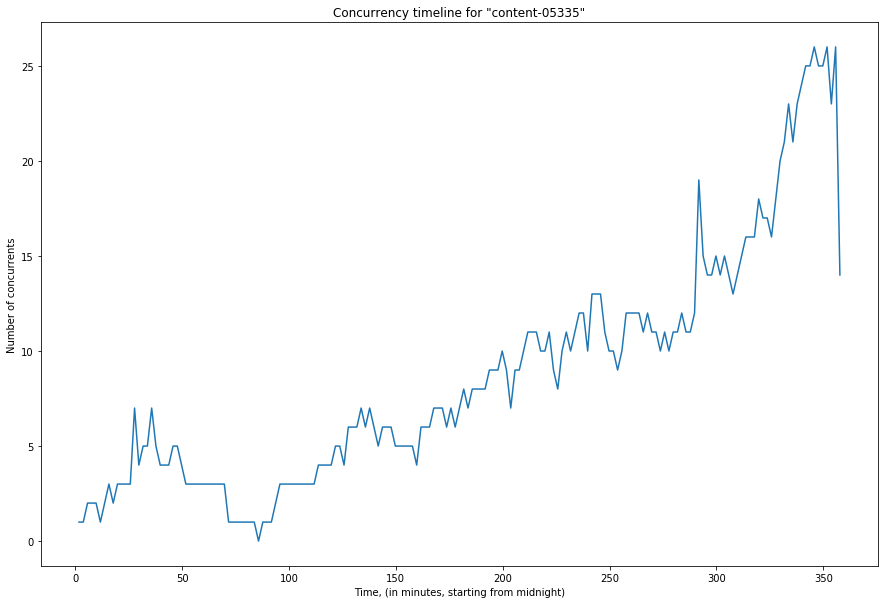

In [213]:
time = [time_window / 60 for time_window in time] # converting seconds into minutes

plt.figure(figsize=(15, 10))
plt.plot(time, concurrency)
plt.title('Concurrency timeline for \"content-05335\"')
plt.xlabel('Time, (in minutes, starting from midnight)')
plt.ylabel('Number of concurrents')
plt.show()

## 4.3

In [217]:
data_frame_q4['concurrency'] = 0

for i in range(number_of_samples_q4):
    numeric_time = float(data_frame_q4.loc[i]['readableDate'].replace(':', '')) # current time value
    # in minutes: 
    current_time = (3600 * (numeric_time // 10000) + 60 * (numeric_time % 10000 // 100) + numeric_time % 100) / 60
    difference = [abs(current_time - j) for j in time]
    index = difference.index(min(difference))
    data_frame_q4.at[i, 'concurrency'] = concurrency[index]
data_frame_q4.iloc[:, 1:].head()

,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload,readableDate,concurrency
0,VOD,ME1,44236588.0,519632.0,0.0,16.96,40,1562457767702,120000.0,0,0,content-05335,True,00:01:47,1
1,VOD,ME1,47163748.0,0.0,0.0,19.36,40,1562457887633,240000.0,0,0,content-05335,False,00:03:47,1
2,VOD,ME1,45913924.0,0.0,0.0,17.83,40,1562458007613,360000.0,0,0,content-05335,False,00:05:47,2
3,VOD,ME1,63711068.0,291840.0,0.0,16.17,43,1562458023114,120000.0,0,0,content-05335,True,00:06:03,2
4,VOD,ME1,36707564.0,0.0,0.0,16.86,40,1562458127846,480000.0,0,0,content-05335,False,00:07:47,2


In [253]:
data_frame_q43 = data_frame_q4[data_frame_q4['concurrency'] < 10]
performance_data_frame = bitrate(data_frame_q43)
performance_data_frame

,company,p2p,cdn,upload,bitRate
0,Streamroot TV,1.169302e+07,202758.209205,3.991816e+06,1.059173e+06


## 4.4

In the current case, we need to evaluate performance as a percentage. For this purpose, we could use some benchmark bitrate values to compare with or compute performance as $1 - \frac{playbackErrors}{bit}$ but I am not sure about notation $playbackErrors$ in relation to the bits.